# Applying Autoencoders to DNA Methylation data from TCGA (MLB Lab) ( 5000 -> 256\*23 -> 500 -> 100 -> 256\*23 -> 5000)

In [3]:
import pandas as pd

In [1]:
import joblib
meth_5000_mvf_path = 'meth_5000_mvf.pkl'
meth_5000_mvf = joblib.load(meth_5000_mvf_path)
meth_5000_mvf.shape

(9756, 5030)

In [11]:
# pancaner_df.dropna(how='all',axis=1,inplace=True) #Removing columns with all nan rows
# pancaner_df.dropna(how='all',axis=0,inplace=True) #Removing rows with all nan columns

### 2. Removing all Nan

### 3. Filling nan cells with mean using numpy

In [4]:
reference_path = r"Y:\qiu-lab\Bridget\data\meth\methylation_raw\methylation_reference.txt"
reference_df = pd.read_csv(reference_path, sep = "\t")
#Remove those rows that don't have a corresponding column in the pancancer dataframe (Maybe they were removed during preprocessing)
pancan_allfeatures = meth_5000_mvf.columns.tolist()
reference_df = reference_df[reference_df["Composite Element REF"].isin(pancan_allfeatures)]
reference_df.shape

(5030, 10)

In [12]:
# reference_df

In [8]:
# Creating a dictionary with all the Chromsomes and their respective Methylation Probes
chr_dict = reference_df.groupby("Chromosome")["Composite Element REF"].apply(list).to_dict()
chr_dict.keys()

dict_keys(['chr1', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr2', 'chr20', 'chr21', 'chr22', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chrX'])

In [14]:
pancancer_meth_list = []
for chromsome, feature_list in chr_dict.items():
#     print(chromsome)
#     print(len(feature_list))
    new_df = meth_5000_mvf[feature_list]
    new_df = new_df.astype('float16')
    print("Done conveting to float16") #For reducing space consumed
    pancancer_meth_list.append(new_df)
len(pancancer_meth_list)

Done conveting to float16
Done conveting to float16
Done conveting to float16
Done conveting to float16
Done conveting to float16
Done conveting to float16
Done conveting to float16
Done conveting to float16
Done conveting to float16
Done conveting to float16
Done conveting to float16
Done conveting to float16
Done conveting to float16
Done conveting to float16
Done conveting to float16
Done conveting to float16
Done conveting to float16
Done conveting to float16
Done conveting to float16
Done conveting to float16
Done conveting to float16
Done conveting to float16
Done conveting to float16


23

In [10]:
# ## Saving the list of chromosome dataframe
# import joblib
# joblib.dump(pancancer_meth_list, "pancancer_meth_chr_nonna_fillnamean.pkl")

# with open ("pancancer_meth_chr_nonna_fillnamean_reference.txt","w+") as outfile:
#     outfile.write(str(chr_dict.keys()))

In [15]:
pancancer_meth_list[0]

,cg00002719,cg00064255,cg00065215,cg00100121,cg00155063,cg00172603,cg00251716,cg00258316,cg00342358,cg00347563,...,cg27636310,rs11249206,rs213028,rs2804694,rs3818562,rs3936238,rs6426327,rs654498,rs715359,rs877309
TCGA-OR-A5J4-01A-11D-A29J-05,0.093140,0.105286,0.589355,0.048004,0.650879,0.936523,0.928223,0.606934,0.097839,0.023987,...,0.911133,0.965820,0.016693,0.974609,0.354248,0.973633,0.973145,0.629883,0.977051,0.183594
TCGA-OR-A5KO-01A-11D-A29J-05,0.030457,0.386475,0.026093,0.032135,0.920410,0.933105,0.935547,0.709961,0.076477,0.031021,...,0.927734,0.970215,0.019669,0.969238,0.968262,0.023422,0.040344,0.869141,0.975098,0.972656
TCGA-OR-A5J9-01A-11D-A29J-05,0.032288,0.788574,0.458740,0.036224,0.827148,0.905762,0.934570,0.837402,0.220703,0.893555,...,0.840332,0.965332,0.472168,0.966797,0.468018,0.106140,0.574707,0.087280,0.533203,0.532227
TCGA-OR-A5K6-01A-11D-A29J-05,0.022842,0.263672,0.035614,0.024445,0.756836,0.864746,0.945312,0.753418,0.113098,0.882324,...,0.869629,0.970215,0.125488,0.428223,0.962402,0.892578,0.965820,0.140747,0.977051,0.971680
TCGA-OR-A5JJ-01A-11D-A29J-05,0.041199,0.094727,0.027924,0.043457,0.754883,0.903320,0.933105,0.622070,0.513184,0.875488,...,0.849609,0.966797,0.018692,0.972656,0.964355,0.968750,0.034088,0.137207,0.184937,0.159058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-V4-A9E5-01A-11D-A39X-05,0.033691,0.090454,0.028976,0.033234,0.591797,0.950195,0.065796,0.935547,0.396240,0.033417,...,0.024094,0.474854,0.969238,0.471924,0.970215,0.482910,0.598633,0.441895,0.977051,0.517578
TCGA-V4-A9EV-01A-11D-A39X-05,0.034332,0.530762,0.042755,0.027634,0.500000,0.772461,0.206177,0.455566,0.116638,0.496826,...,0.020569,0.020767,0.019852,0.459473,0.473877,0.464355,0.540039,0.460938,0.026245,0.968750
TCGA-WC-AA9A-01A-11D-A39X-05,0.029709,0.647461,0.039307,0.024078,0.962891,0.862793,0.056793,0.875977,0.116394,0.607910,...,0.030487,0.958984,0.035706,0.024963,0.024612,0.046509,0.579590,0.186646,0.970215,0.963867
TCGA-VD-AA8S-01B-11D-A39X-05,0.026031,0.859375,0.026535,0.026154,0.760254,0.923340,0.071655,0.926758,0.745605,0.906738,...,0.546875,0.964355,0.024933,0.964355,0.025146,0.026901,0.033112,0.538574,0.976562,0.017944


### 5. Building a Vanilla Autoencoder

In [16]:
import tensorflow as tf
# print(tf.__version__)
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


In [17]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt

import tensorflow as tf
from numpy.random import seed
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Concatenate
from keras.models import Model
from keras import backend as K #For explicitly \adjusting the learning rate

In [18]:
X_train, X_val = train_test_split(pancancer_meth_list[0], test_size=0.2, random_state = seed(77))
#Since the samples will be split similarly across all chromosomes, we shall match the indices for 
# X_train and X_val across all chr
training_indices = X_train.index
validation_indices = X_val.index

X_train_list = []
X_val_list = []
for chrom_df in pancancer_meth_list:
    X_train_list.append(chrom_df.loc[training_indices])
    X_val_list.append(chrom_df.loc[validation_indices])

In [264]:
ncol_list = []
for df in pancancer_meth_list:
    ncol_list.append(df.shape[1])
    
number_of_chromosomes = len(pancancer_meth_list)

chromsomome_dim = 30 # 30*23
hidden_layer_dim = 100 
encoding_dim = 50 #Nodes in Bottleneck layer


# Encoder Layers
encoded1_list = []
input_dim_list = []
for ncol in ncol_list:
    input_dim_i = Input(shape = (ncol, ))
    input_dim_list.append(input_dim_i)
    encoded1_list.append(Dense(chromsomome_dim, activation = 'relu')(input_dim_i))

encoded1 = Concatenate(axis=1)(encoded1_list)
encoded2 = Dense(hidden_layer_dim, activation = 'relu')(encoded1)
encoded3 = Dense(encoding_dim, activation = 'relu')(encoded2)

# Decoder Layers
decoded3 = Dense(hidden_layer_dim, activation = 'relu')(encoded3)
decoded2 = Dense(chromsomome_dim*number_of_chromosomes, activation = 'relu')(decoded3)

reconstructured_inputs = []
for i in range(0,number_of_chromosomes):
    start = chromsomome_dim*(i)
    end = chromsomome_dim*i+1
    decoded2_i = decoded2[:,start:end] #Splicing the tensor back to chromsomome_dim*23 tensors
    reconstructured_inputs.append(Dense(ncol_list[i], activation = 'sigmoid')(decoded2_i))

In [265]:
def averaged_mean_squared_error(y_true, y_pred):
        return (K.sqrt(K.mean(K.square(y_pred - y_true))))/number_of_chromosomes

In [341]:
K.losses.BinaryCrossentropy(reduction='sum')

AttributeError: module 'keras.backend' has no attribute 'losses'

In [323]:
autoencoder = Model(inputs = input_dim_list, outputs = reconstructured_inputs)
# Compile the Model
autoencoder.compile(optimizer = 'adam', loss = averaged_mean_squared_error) 
#adam - stochastic gradient descent algorithm
K.set_value(autoencoder.optimizer.learning_rate, 0.0001)
autoencoder.summary()

Model: "model_29"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_47 (InputLayer)          [(None, 409)]        0           []                               
                                                                                                  
 input_48 (InputLayer)          [(None, 270)]        0           []                               
                                                                                                  
 input_49 (InputLayer)          [(None, 234)]        0           []                               
                                                                                                  
 input_50 (InputLayer)          [(None, 281)]        0           []                               
                                                                                           

 dense_115 (Dense)              (None, 30)           8610        ['input_64[0][0]']               
                                                                                                  
 dense_116 (Dense)              (None, 30)           11700       ['input_65[0][0]']               
                                                                                                  
 dense_117 (Dense)              (None, 30)           11820       ['input_66[0][0]']               
                                                                                                  
 dense_118 (Dense)              (None, 30)           7290        ['input_67[0][0]']               
                                                                                                  
 dense_119 (Dense)              (None, 30)           2130        ['input_68[0][0]']               
                                                                                                  
 dense_120

 tf.__operators__.getitem_59 (S  (None, 1)           0           ['dense_124[0][0]']              
 licingOpLambda)                                                                                  
                                                                                                  
 tf.__operators__.getitem_60 (S  (None, 1)           0           ['dense_124[0][0]']              
 licingOpLambda)                                                                                  
                                                                                                  
 tf.__operators__.getitem_61 (S  (None, 1)           0           ['dense_124[0][0]']              
 licingOpLambda)                                                                                  
                                                                                                  
 tf.__operators__.getitem_62 (S  (None, 1)           0           ['dense_124[0][0]']              
 licingOpL

                                                                                                  
 dense_143 (Dense)              (None, 389)          778         ['tf.__operators__.getitem_64[0][
                                                                 0]']                             
                                                                                                  
 dense_144 (Dense)              (None, 393)          786         ['tf.__operators__.getitem_65[0][
                                                                 0]']                             
                                                                                                  
 dense_145 (Dense)              (None, 242)          484         ['tf.__operators__.getitem_66[0][
                                                                 0]']                             
                                                                                                  
 dense_146

In [324]:
#Implementing Early Stopping
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
import datetime

# earlystopping_callback = EarlyStopping(monitor='val_loss', patience=4, min_delta=0.0001)

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# import h5py
# !pip install --upgrade h5py=1.8.21
# #Saving best Model after the Stopping
# mc = ModelCheckpoint('meth_ae_v1.h5', monitor='val_loss', mode='min', save_best_only=True, verbose=1)

In [325]:
print(log_dir)

logs/fit/20220329-225024


In [326]:
history = autoencoder.fit(X_train_list, X_train_list, epochs = 100, batch_size = 32, shuffle = False, verbose = 1, validation_data = (X_val_list, X_val_list), callbacks=[tensorboard_callback])

Epoch 1/100
244/244 [==============================] - 17s 50ms/step - loss: 0.2585 - dense_125_loss: 0.0112 - dense_126_loss: 0.0114 - dense_127_loss: 0.0127 - dense_128_loss: 0.0113 - dense_129_loss: 0.0111 - dense_130_loss: 0.0103 - dense_131_loss: 0.0113 - dense_132_loss: 0.0115 - dense_133_loss: 0.0116 - dense_134_loss: 0.0105 - dense_135_loss: 0.0110 - dense_136_loss: 0.0111 - dense_137_loss: 0.0126 - dense_138_loss: 0.0113 - dense_139_loss: 0.0120 - dense_140_loss: 0.0111 - dense_141_loss: 0.0110 - dense_142_loss: 0.0111 - dense_143_loss: 0.0111 - dense_144_loss: 0.0113 - dense_145_loss: 0.0126 - dense_146_loss: 0.0116 - dense_147_loss: 0.0079 - val_loss: 0.2586 - val_dense_125_loss: 0.0112 - val_dense_126_loss: 0.0114 - val_dense_127_loss: 0.0126 - val_dense_128_loss: 0.0113 - val_dense_129_loss: 0.0111 - val_dense_130_loss: 0.0103 - val_dense_131_loss: 0.0113 - val_dense_132_loss: 0.0115 - val_dense_133_loss: 0.0115 - val_dense_134_loss: 0.0105 - val_dense_135_loss: 0.0110 - v

244/244 [==============================] - 10s 43ms/step - loss: 0.2584 - dense_125_loss: 0.0112 - dense_126_loss: 0.0113 - dense_127_loss: 0.0127 - dense_128_loss: 0.0113 - dense_129_loss: 0.0111 - dense_130_loss: 0.0103 - dense_131_loss: 0.0113 - dense_132_loss: 0.0115 - dense_133_loss: 0.0116 - dense_134_loss: 0.0105 - dense_135_loss: 0.0110 - dense_136_loss: 0.0111 - dense_137_loss: 0.0126 - dense_138_loss: 0.0113 - dense_139_loss: 0.0120 - dense_140_loss: 0.0111 - dense_141_loss: 0.0110 - dense_142_loss: 0.0111 - dense_143_loss: 0.0111 - dense_144_loss: 0.0113 - dense_145_loss: 0.0126 - dense_146_loss: 0.0115 - dense_147_loss: 0.0079 - val_loss: 0.2585 - val_dense_125_loss: 0.0112 - val_dense_126_loss: 0.0114 - val_dense_127_loss: 0.0126 - val_dense_128_loss: 0.0113 - val_dense_129_loss: 0.0111 - val_dense_130_loss: 0.0103 - val_dense_131_loss: 0.0113 - val_dense_132_loss: 0.0115 - val_dense_133_loss: 0.0115 - val_dense_134_loss: 0.0105 - val_dense_135_loss: 0.0110 - val_dense_136

244/244 [==============================] - 11s 43ms/step - loss: 0.2584 - dense_125_loss: 0.0112 - dense_126_loss: 0.0113 - dense_127_loss: 0.0127 - dense_128_loss: 0.0113 - dense_129_loss: 0.0111 - dense_130_loss: 0.0103 - dense_131_loss: 0.0113 - dense_132_loss: 0.0115 - dense_133_loss: 0.0116 - dense_134_loss: 0.0105 - dense_135_loss: 0.0110 - dense_136_loss: 0.0111 - dense_137_loss: 0.0126 - dense_138_loss: 0.0113 - dense_139_loss: 0.0120 - dense_140_loss: 0.0111 - dense_141_loss: 0.0109 - dense_142_loss: 0.0111 - dense_143_loss: 0.0111 - dense_144_loss: 0.0113 - dense_145_loss: 0.0126 - dense_146_loss: 0.0115 - dense_147_loss: 0.0079 - val_loss: 0.2585 - val_dense_125_loss: 0.0112 - val_dense_126_loss: 0.0114 - val_dense_127_loss: 0.0126 - val_dense_128_loss: 0.0113 - val_dense_129_loss: 0.0111 - val_dense_130_loss: 0.0103 - val_dense_131_loss: 0.0113 - val_dense_132_loss: 0.0115 - val_dense_133_loss: 0.0115 - val_dense_134_loss: 0.0105 - val_dense_135_loss: 0.0110 - val_dense_136

244/244 [==============================] - 10s 40ms/step - loss: 0.2584 - dense_125_loss: 0.0112 - dense_126_loss: 0.0113 - dense_127_loss: 0.0127 - dense_128_loss: 0.0113 - dense_129_loss: 0.0111 - dense_130_loss: 0.0103 - dense_131_loss: 0.0113 - dense_132_loss: 0.0115 - dense_133_loss: 0.0116 - dense_134_loss: 0.0105 - dense_135_loss: 0.0110 - dense_136_loss: 0.0111 - dense_137_loss: 0.0126 - dense_138_loss: 0.0113 - dense_139_loss: 0.0120 - dense_140_loss: 0.0111 - dense_141_loss: 0.0109 - dense_142_loss: 0.0111 - dense_143_loss: 0.0111 - dense_144_loss: 0.0113 - dense_145_loss: 0.0126 - dense_146_loss: 0.0115 - dense_147_loss: 0.0079 - val_loss: 0.2585 - val_dense_125_loss: 0.0112 - val_dense_126_loss: 0.0114 - val_dense_127_loss: 0.0126 - val_dense_128_loss: 0.0113 - val_dense_129_loss: 0.0111 - val_dense_130_loss: 0.0103 - val_dense_131_loss: 0.0113 - val_dense_132_loss: 0.0115 - val_dense_133_loss: 0.0115 - val_dense_134_loss: 0.0105 - val_dense_135_loss: 0.0110 - val_dense_136

244/244 [==============================] - 10s 41ms/step - loss: 0.2584 - dense_125_loss: 0.0112 - dense_126_loss: 0.0113 - dense_127_loss: 0.0127 - dense_128_loss: 0.0113 - dense_129_loss: 0.0111 - dense_130_loss: 0.0103 - dense_131_loss: 0.0113 - dense_132_loss: 0.0115 - dense_133_loss: 0.0116 - dense_134_loss: 0.0105 - dense_135_loss: 0.0110 - dense_136_loss: 0.0111 - dense_137_loss: 0.0126 - dense_138_loss: 0.0113 - dense_139_loss: 0.0120 - dense_140_loss: 0.0111 - dense_141_loss: 0.0109 - dense_142_loss: 0.0111 - dense_143_loss: 0.0111 - dense_144_loss: 0.0113 - dense_145_loss: 0.0126 - dense_146_loss: 0.0115 - dense_147_loss: 0.0079 - val_loss: 0.2585 - val_dense_125_loss: 0.0112 - val_dense_126_loss: 0.0114 - val_dense_127_loss: 0.0126 - val_dense_128_loss: 0.0113 - val_dense_129_loss: 0.0111 - val_dense_130_loss: 0.0103 - val_dense_131_loss: 0.0113 - val_dense_132_loss: 0.0115 - val_dense_133_loss: 0.0115 - val_dense_134_loss: 0.0105 - val_dense_135_loss: 0.0110 - val_dense_136

244/244 [==============================] - 10s 41ms/step - loss: 0.2584 - dense_125_loss: 0.0112 - dense_126_loss: 0.0113 - dense_127_loss: 0.0127 - dense_128_loss: 0.0113 - dense_129_loss: 0.0111 - dense_130_loss: 0.0103 - dense_131_loss: 0.0113 - dense_132_loss: 0.0115 - dense_133_loss: 0.0116 - dense_134_loss: 0.0105 - dense_135_loss: 0.0110 - dense_136_loss: 0.0111 - dense_137_loss: 0.0126 - dense_138_loss: 0.0113 - dense_139_loss: 0.0120 - dense_140_loss: 0.0111 - dense_141_loss: 0.0109 - dense_142_loss: 0.0111 - dense_143_loss: 0.0111 - dense_144_loss: 0.0113 - dense_145_loss: 0.0126 - dense_146_loss: 0.0115 - dense_147_loss: 0.0079 - val_loss: 0.2585 - val_dense_125_loss: 0.0112 - val_dense_126_loss: 0.0114 - val_dense_127_loss: 0.0126 - val_dense_128_loss: 0.0113 - val_dense_129_loss: 0.0111 - val_dense_130_loss: 0.0103 - val_dense_131_loss: 0.0113 - val_dense_132_loss: 0.0115 - val_dense_133_loss: 0.0115 - val_dense_134_loss: 0.0105 - val_dense_135_loss: 0.0110 - val_dense_136

244/244 [==============================] - 10s 41ms/step - loss: 0.2584 - dense_125_loss: 0.0112 - dense_126_loss: 0.0113 - dense_127_loss: 0.0127 - dense_128_loss: 0.0113 - dense_129_loss: 0.0111 - dense_130_loss: 0.0103 - dense_131_loss: 0.0113 - dense_132_loss: 0.0115 - dense_133_loss: 0.0116 - dense_134_loss: 0.0105 - dense_135_loss: 0.0110 - dense_136_loss: 0.0111 - dense_137_loss: 0.0126 - dense_138_loss: 0.0113 - dense_139_loss: 0.0120 - dense_140_loss: 0.0111 - dense_141_loss: 0.0109 - dense_142_loss: 0.0111 - dense_143_loss: 0.0111 - dense_144_loss: 0.0113 - dense_145_loss: 0.0126 - dense_146_loss: 0.0115 - dense_147_loss: 0.0079 - val_loss: 0.2585 - val_dense_125_loss: 0.0112 - val_dense_126_loss: 0.0114 - val_dense_127_loss: 0.0126 - val_dense_128_loss: 0.0113 - val_dense_129_loss: 0.0111 - val_dense_130_loss: 0.0103 - val_dense_131_loss: 0.0113 - val_dense_132_loss: 0.0115 - val_dense_133_loss: 0.0115 - val_dense_134_loss: 0.0105 - val_dense_135_loss: 0.0110 - val_dense_136

244/244 [==============================] - 10s 41ms/step - loss: 0.2584 - dense_125_loss: 0.0112 - dense_126_loss: 0.0113 - dense_127_loss: 0.0127 - dense_128_loss: 0.0113 - dense_129_loss: 0.0111 - dense_130_loss: 0.0103 - dense_131_loss: 0.0113 - dense_132_loss: 0.0115 - dense_133_loss: 0.0116 - dense_134_loss: 0.0105 - dense_135_loss: 0.0110 - dense_136_loss: 0.0111 - dense_137_loss: 0.0126 - dense_138_loss: 0.0113 - dense_139_loss: 0.0120 - dense_140_loss: 0.0111 - dense_141_loss: 0.0109 - dense_142_loss: 0.0111 - dense_143_loss: 0.0111 - dense_144_loss: 0.0113 - dense_145_loss: 0.0126 - dense_146_loss: 0.0115 - dense_147_loss: 0.0079 - val_loss: 0.2585 - val_dense_125_loss: 0.0112 - val_dense_126_loss: 0.0114 - val_dense_127_loss: 0.0126 - val_dense_128_loss: 0.0113 - val_dense_129_loss: 0.0111 - val_dense_130_loss: 0.0103 - val_dense_131_loss: 0.0113 - val_dense_132_loss: 0.0115 - val_dense_133_loss: 0.0115 - val_dense_134_loss: 0.0105 - val_dense_135_loss: 0.0110 - val_dense_136

244/244 [==============================] - 10s 41ms/step - loss: 0.2584 - dense_125_loss: 0.0112 - dense_126_loss: 0.0113 - dense_127_loss: 0.0127 - dense_128_loss: 0.0113 - dense_129_loss: 0.0111 - dense_130_loss: 0.0103 - dense_131_loss: 0.0113 - dense_132_loss: 0.0115 - dense_133_loss: 0.0116 - dense_134_loss: 0.0105 - dense_135_loss: 0.0110 - dense_136_loss: 0.0111 - dense_137_loss: 0.0126 - dense_138_loss: 0.0113 - dense_139_loss: 0.0120 - dense_140_loss: 0.0111 - dense_141_loss: 0.0109 - dense_142_loss: 0.0111 - dense_143_loss: 0.0111 - dense_144_loss: 0.0113 - dense_145_loss: 0.0126 - dense_146_loss: 0.0115 - dense_147_loss: 0.0079 - val_loss: 0.2585 - val_dense_125_loss: 0.0112 - val_dense_126_loss: 0.0114 - val_dense_127_loss: 0.0126 - val_dense_128_loss: 0.0113 - val_dense_129_loss: 0.0111 - val_dense_130_loss: 0.0103 - val_dense_131_loss: 0.0113 - val_dense_132_loss: 0.0115 - val_dense_133_loss: 0.0115 - val_dense_134_loss: 0.0105 - val_dense_135_loss: 0.0110 - val_dense_136

In [327]:
len(history.history['loss'])

100

dict_keys(['loss', 'dense_125_loss', 'dense_126_loss', 'dense_127_loss', 'dense_128_loss', 'dense_129_loss', 'dense_130_loss', 'dense_131_loss', 'dense_132_loss', 'dense_133_loss', 'dense_134_loss', 'dense_135_loss', 'dense_136_loss', 'dense_137_loss', 'dense_138_loss', 'dense_139_loss', 'dense_140_loss', 'dense_141_loss', 'dense_142_loss', 'dense_143_loss', 'dense_144_loss', 'dense_145_loss', 'dense_146_loss', 'dense_147_loss', 'val_loss', 'val_dense_125_loss', 'val_dense_126_loss', 'val_dense_127_loss', 'val_dense_128_loss', 'val_dense_129_loss', 'val_dense_130_loss', 'val_dense_131_loss', 'val_dense_132_loss', 'val_dense_133_loss', 'val_dense_134_loss', 'val_dense_135_loss', 'val_dense_136_loss', 'val_dense_137_loss', 'val_dense_138_loss', 'val_dense_139_loss', 'val_dense_140_loss', 'val_dense_141_loss', 'val_dense_142_loss', 'val_dense_143_loss', 'val_dense_144_loss', 'val_dense_145_loss', 'val_dense_146_loss', 'val_dense_147_loss'])


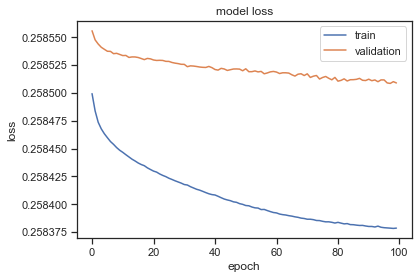

In [328]:
#Visualizing the Loss over epochs
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [87]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

In [329]:
#Obtain the reduced data
encoder = Model(inputs = input_dim_list, outputs = encoded3)
# encoded_input = Input(shape = (encoding_dim, ))

encoded_train = pd.DataFrame(encoder.predict(pancancer_meth_list), index=pancancer_meth_list[0].index) #Maintain Index for Mapping to cancer type 
encoded_train = encoded_train.add_prefix('feature_')
encoded_train.shape

(9756, 50)

In [330]:
#output dataset
shape_before_removing_nan = encoded_train.shape
encoded_train.replace(0, np.nan, inplace=True) #Converting all the zero's to nan to use nan command
encoded_train.dropna(how='all',axis=1, inplace=True) #Removing columns with all nan rows
encoded_train.dropna(how='all',axis=0, inplace=True) #Removing rows with all nan columns
encoded_train.replace(np.nan, 0, inplace=True) #Converting all the nan's to zero to be compatible with t-SNE
print(shape_before_removing_nan, encoded_train.shape)

# encoded_train.to_csv("Meth_AE_v2.csv", index=True)
# encoded_train = pd.read_csv("Meth_AE_v2.csv",index_col=[0,1,2,3,4])

(9756, 50) (9756, 39)


In [331]:
#Scaling these features to -1,1 range for applying tsne
from sklearn.preprocessing import MinMaxScaler
feature_list = encoded_train.columns.tolist()
scaler = MinMaxScaler(feature_range=(0,1))
encoded_train[feature_list] = scaler.fit_transform(encoded_train[feature_list])

In [332]:
# encoded_train = pd.read_csv("Meth_AE_v2.csv",index_col=[0,1,2,3,4])

In [333]:
encoded_train.head()

,feature_1,feature_3,feature_4,feature_5,feature_7,feature_8,feature_10,feature_11,feature_12,feature_14,...,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_47,feature_49
TCGA-OR-A5J4-01A-11D-A29J-05,0.654096,0.161995,0.000000,0.303175,0.120357,0.245263,0.165219,0.144282,0.0,0.160704,...,0.190657,0.265746,0.000000,0.0,0.456154,0.564653,0.131071,0.391374,0.237620,0.184605
TCGA-OR-A5KO-01A-11D-A29J-05,0.681749,0.108004,0.000000,0.376586,0.477624,0.255196,0.309497,0.139239,0.0,0.348588,...,0.399743,0.246304,0.093516,0.0,0.291183,0.377269,0.372404,0.426761,0.431336,0.273928
TCGA-OR-A5J9-01A-11D-A29J-05,0.411884,0.114619,0.000000,0.361836,0.213509,0.285324,0.193245,0.159555,0.0,0.343494,...,0.258800,0.491891,0.000000,0.0,0.201497,0.649166,0.216065,0.413393,0.325029,0.339626
TCGA-OR-A5K6-01A-11D-A29J-05,0.575467,0.113753,0.000000,0.339125,0.501461,0.241792,0.363460,0.188080,0.0,0.362807,...,0.404648,0.184483,0.084129,0.0,0.386314,0.334632,0.393746,0.404969,0.460375,0.344152
TCGA-OR-A5JJ-01A-11D-A29J-05,0.027286,0.045354,0.209522,0.338985,0.184013,0.205844,0.384394,0.427836,0.0,0.409269,...,0.312405,0.581596,0.021475,0.0,0.263040,0.577362,0.375991,0.431096,0.430304,0.311626


### 6. Dimension Reduction and Cluster Visualization using t-SNE 


perplexity parameter can be changed based on the input datatset - dataset with larger number of variables requires larger perplexity set this value between 5 and 50 (sklearn documentation) verbose=1 displays run time messages set n_iter sufficiently high to resolve the well stabilized cluster get embeddings


In [334]:
# Perform t-SNE on AE encoded_features
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca', random_state=0, perplexity=40, learning_rate=300, n_iter=400, verbose=1)
tsne_out = tsne.fit_transform(encoded_train)
# tsne_out = TSNE(n_components=2, perplexity=105, n_iter=1000, verbose=1).fit_transform(encoded_train)
tsne_components = pd.DataFrame(tsne_out, index =encoded_train.index ) #Maintain Index


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 9756 samples in 0.000s...
[t-SNE] Computed neighbors for 9756 samples in 2.422s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9756
[t-SNE] Computed conditional probabilities for sample 2000 / 9756
[t-SNE] Computed conditional probabilities for sample 3000 / 9756
[t-SNE] Computed conditional probabilities for sample 4000 / 9756
[t-SNE] Computed conditional probabilities for sample 5000 / 9756
[t-SNE] Computed conditional probabilities for sample 6000 / 9756
[t-SNE] Computed conditional probabilities for sample 7000 / 9756
[t-SNE] Computed conditional probabilities for sample 8000 / 9756
[t-SNE] Computed conditional probabilities for sample 9000 / 9756
[t-SNE] Computed conditional probabilities for sample 9756 / 9756
[t-SNE] Mean sigma: 0.142339


C:\Users\ssrikrishnan6\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.761848
[t-SNE] KL divergence after 400 iterations: 1.750113


In [335]:
tsne_components = pd.DataFrame(tsne_out, index =encoded_train.index ) #Maintain Index
tsne_components.head()

,0,1
TCGA-OR-A5J4-01A-11D-A29J-05,-14.965434,-3.270209
TCGA-OR-A5KO-01A-11D-A29J-05,3.538133,-13.487144
TCGA-OR-A5J9-01A-11D-A29J-05,-13.310002,-2.251197
TCGA-OR-A5K6-01A-11D-A29J-05,3.782897,-13.733727
TCGA-OR-A5JJ-01A-11D-A29J-05,-4.460017,23.691576


### 7. Mapping samples to cancer type


In [336]:
import pandas as pd
patient_metadata = pd.read_csv(r"C:\Users\ssrikrishnan6\ae_integration\info_all_ex.txt", sep = "\t")
patient_metadata = patient_metadata[[ 'cases.0.samples.0.portions.0.analytes.0.aliquots.0.submitter_id','cases.0.project.project_id','cases.0.samples.0.sample_type']] #tolist()
patient_metadata.rename(columns={'cases.0.project.project_id': "cancer_type", "cases.0.samples.0.portions.0.analytes.0.aliquots.0.submitter_id":"tcga_id"},inplace=True)
patient_metadata.set_index("tcga_id", inplace=True)

new_patient_indices = []
for index in patient_metadata.index:
    new_patient_indices.append("-".join(index.split("-")[:-3]))
patient_metadata.index = new_patient_indices

In [337]:
new_indices = []
for index in tsne_components.index:
    new_index = "-".join(index.split("-")[:4])
    new_indices.append(new_index)
tsne_components.index = new_indices

# new_tsne_components = tsne_components.copy()
# new_tsne_components.index = new_indices

# #Merging based on tcga_id
grouped_tsne = pd.merge(tsne_components , patient_metadata['cancer_type'] , left_index=True, right_index=True)

print(grouped_tsne.shape)
grouped_tsne.head()

(9151, 3)


,0,1,cancer_type
TCGA-05-4384-01A,8.010893,6.700259,TCGA-LUAD
TCGA-05-4390-01A,-15.023335,-14.427977,TCGA-LUAD
TCGA-05-4396-01A,-15.335545,9.000479,TCGA-LUAD
TCGA-05-4405-01A,-13.936017,-12.329161,TCGA-LUAD
TCGA-05-4410-01A,-6.824924,6.784144,TCGA-LUAD


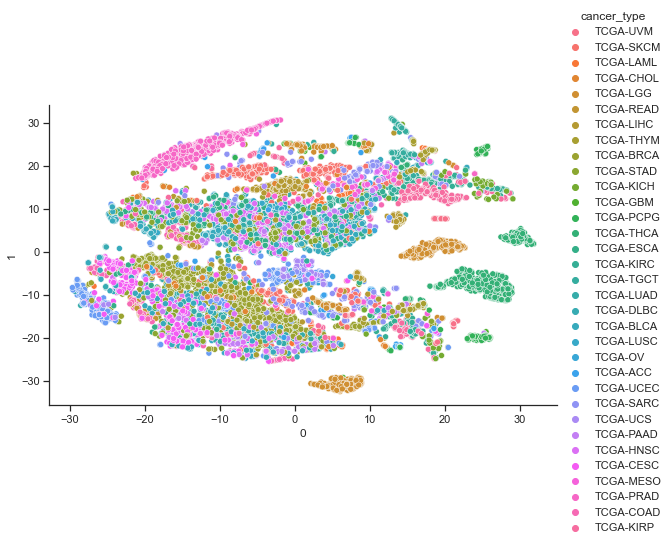

In [338]:
# CURRENT
import matplotlib.pyplot as plt
import seaborn
seaborn.set(style='ticks')

cancer_types = grouped_tsne['cancer_type'].tolist()
cancer_types = list(set(cancer_types))

seaborn.relplot(data=grouped_tsne, x=0, y=1, hue='cancer_type', hue_order=cancer_types, aspect=1.61)
plt.show()

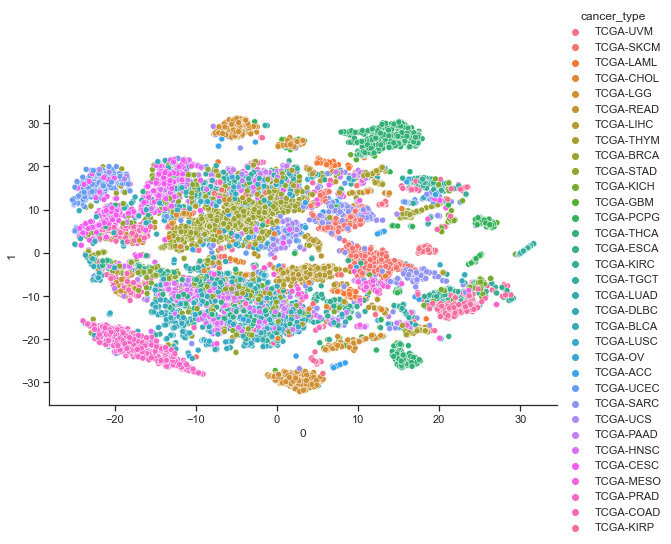

In [135]:
# Batch Size = 64, learning rate = 0.0001
import matplotlib.pyplot as plt
import seaborn
seaborn.set(style='ticks')

cancer_types = grouped_tsne['cancer_type'].tolist()
cancer_types = list(set(cancer_types))

seaborn.relplot(data=grouped_tsne, x=0, y=1, hue='cancer_type', hue_order=cancer_types, aspect=1.61)
plt.show()

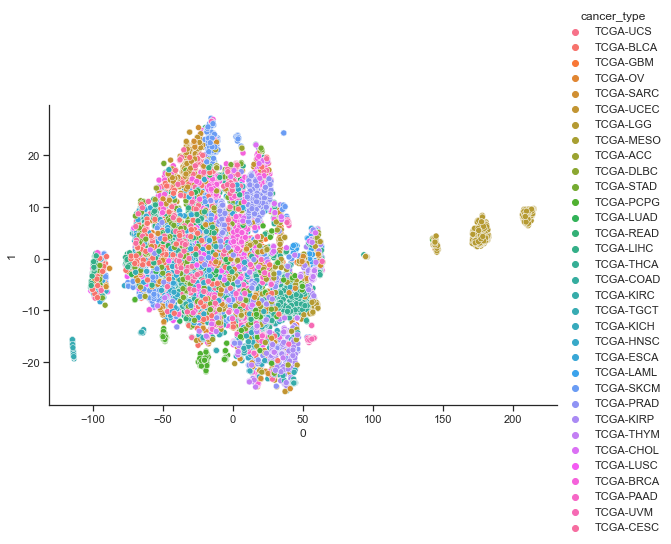

In [53]:
import matplotlib.pyplot as plt
import seaborn
seaborn.set(style='ticks')

cancer_types = grouped_tsne['cancer_type'].tolist()
cancer_types = list(set(cancer_types))

seaborn.relplot(data=grouped_tsne, x=0, y=1, hue='cancer_type', hue_order=cancer_types, aspect=1.61)
plt.show()

Relplot = A figure-level function for visualizing statistical relationships using two common approaches: scatter plots and line plots. relplot() combines a FacetGrid with one of two axes-level functions: scatterplot() (with kind="scatter" ; the default)

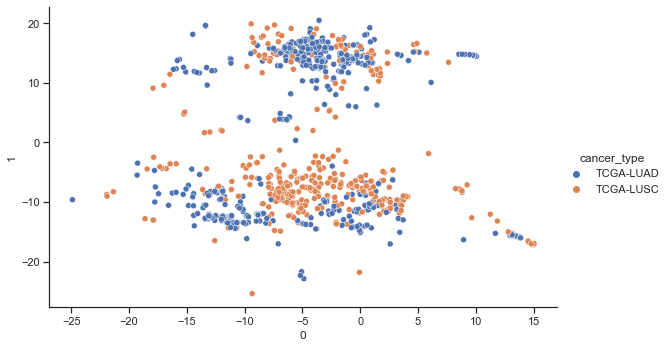

In [166]:
lung_cancer_types = ["TCGA-LUAD","TCGA-LUSC"] 
lung_cancer_df = grouped_tsne[grouped_tsne['cancer_type'].isin(lung_cancer_types)]

seaborn.relplot(data=lung_cancer_df, x=0, y=1, hue='cancer_type', hue_order=lung_cancer_types, aspect=1.61)
plt.show()

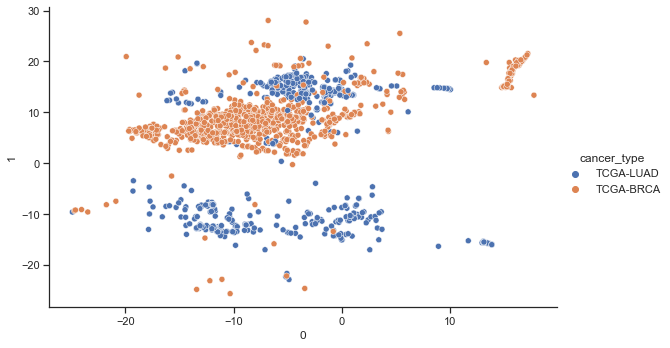

In [167]:
lung_breast_cancer_types = ["TCGA-LUAD","TCGA-BRCA"] 
lung_breast_cancer_df = grouped_tsne[grouped_tsne['cancer_type'].isin(lung_breast_cancer_types)]

seaborn.relplot(data=lung_breast_cancer_df, x=0, y=1, hue='cancer_type', hue_order=lung_breast_cancer_types, aspect=1.61)
plt.show()

In [4]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
import os
print (os.environ['CONDA_DEFAULT_ENV'])

tf_gpu


In [8]:
def plot_latent(z, anno, save = None, figsize = (10,10), axis_label = "Latent", **kwargs):
    _kwargs = {
        "s": 10,
        "alpha": 0.9,
    }
    _kwargs.update(kwargs)

    fig = plt.figure(figsize = figsize)
    ax = fig.add_subplot()
    cluster_types = set([x for x in np.unique(anno)])
    colormap = plt.cm.get_cmap("tab20", len(cluster_types))

    for i, cluster_type in enumerate(cluster_types):
        index = np.where(anno == cluster_type)[0]
        ax.scatter(z[index,0], z[index,1], color = colormap(i), label = cluster_type, **_kwargs)
    
    ax.legend(loc='upper left', prop={'size': 15}, frameon = False, ncol = 1, bbox_to_anchor=(1.04, 1))
    
    ax.tick_params(axis = "both", which = "major", labelsize = 15)

    ax.set_xlabel(axis_label + " 1", fontsize = 19)
    ax.set_ylabel(axis_label + " 2", fontsize = 19)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)  
    
    if save:
        fig.savefig(save, bbox_inches = "tight")
    
    print(save)


# plot_latent(ae_coordinates, anno_ctrl, axis_label = "Latent", save = "AE.pdf")

In [7]:
 !pip3 show tensorflow

Name: tensorflow
Version: 2.8.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\ssrikrishnan6\anaconda3\lib\site-packages
Requires: libclang, six, h5py, keras-preprocessing, termcolor, google-pasta, opt-einsum, tensorboard, gast, astunparse, flatbuffers, tf-estimator-nightly, tensorflow-io-gcs-filesystem, grpcio, protobuf, typing-extensions, absl-py, setuptools, wrapt, numpy, keras
Required-by: 


In [ ]:
import tf-night